<a href="https://colab.research.google.com/github/anas-hamada/projects/blob/main/Turkish_sign_language_letters_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this is my final year graduation project and my final goal is to build a real-time sign language detector for the Turkish sign language

In [ ]:
# importing the important libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# uploading the data from my drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
# resizing the images
import os
import cv2
for i in os.listdir('/content/gdrive/MyDrive/small dataset images/Images'):
  image=cv2.imread("/content/gdrive/MyDrive/small dataset images/Images/"+i)
  resized=cv2.resize(image,(227,227))
  cv2. imwrite(os. path. join('/content/resized images' , i), resized)

In [ ]:
 list1=os.listdir('/content/gdrive/MyDrive/small dataset images/Images')
 import random
 random.shuffle(list1)

In [ ]:
# labeling the data and creating x and y
letters=['A' , 'B' , 'C' , 'Ç' , 'D' , 'E' , 'F' , 'G' , 'Ğ' , 'H' , 'İ' , 'I' , 'J' , 'K' , 'L' , 'M' , 'N' , 'O' , 'Ö' , 'P' , 'R' , 'S' , 'Ş' , 'T' , 'U' , 'Ü' , 'V' , 'Y' , 'Z']
X=[]
Y=[]
for j in list1:
  X.append(cv2.imread("/content/resized images/"+j))
  if j[0]=='c':
    Y.append(letters.index('Ç'))
  elif j[0]=='g':
    Y.append(letters.index('Ğ'))
  elif j[0]=='i':
    Y.append(letters.index('İ'))
  elif j[0]=='s':
    Y.append(letters.index('Ş'))
  elif j[0]=='u':
    Y.append(letters.index('Ü'))
  elif j[0]=='o':
    Y.append(letters.index('Ö'))
  else:
    Y.append(letters.index(j[0]))

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
print(X.shape,Y.shape)

(2682, 227, 227, 3) (2682,)


In [ ]:
''' creating train and test arrays of x and y with taking into consideration that not all letters have the same number of images because some
 letters ('Ç','Ğ','İ','Ş','Ü','Ö') where not in the original dataset so i collected them manually'''
X_train=[]
X_test=[]
y_train=[]
y_test=[]
for l in letters:
  num_of_items_stored=0
  for index,item in enumerate(Y):
    if letters[item]==l:
      if ((num_of_items_stored>=85)|(l in ['Ç','Ğ','İ','Ş','Ü','Ö']) & (num_of_items_stored>=40)):
        X_test.append(X[index])
        y_test.append(letters.index(l))
        num_of_items_stored+=1
      else:
        X_train.append(X[index])
        y_train.append(letters.index(l))
        num_of_items_stored+=1

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2195, 227, 227, 3) (487, 227, 227, 3) (2195,) (487,)


In [ ]:
# a function that displays each image with its corresponding letter
def plot_sample(X, y, index):
    plt.imshow(X[index])
    plt.xlabel(letters[y[index]])

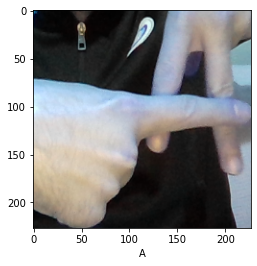

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
# scaling the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# creating an alex net neural network and fitting the data to it

In [ ]:
model = models.Sequential([
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(29, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=70)

Epoch 1/70
69/69 [==============================] - 13s 61ms/step - loss: 12.2975 - accuracy: 0.1599
Epoch 2/70
69/69 [==============================] - 4s 53ms/step - loss: 2.4427 - accuracy: 0.4159
Epoch 3/70
69/69 [==============================] - 4s 53ms/step - loss: 1.8872 - accuracy: 0.5380
Epoch 4/70
69/69 [==============================] - 4s 54ms/step - loss: 1.6730 - accuracy: 0.6123
Epoch 5/70
69/69 [==============================] - 4s 53ms/step - loss: 1.5968 - accuracy: 0.6519
Epoch 6/70
69/69 [==============================] - 4s 54ms/step - loss: 1.6476 - accuracy: 0.6446
Epoch 7/70
69/69 [==============================] - 4s 54ms/step - loss: 1.3982 - accuracy: 0.7052
Epoch 8/70
69/69 [==============================] - 4s 54ms/step - loss: 1.4320 - accuracy: 0.7134
Epoch 9/70
69/69 [==============================] - 4s 54ms/step - loss: 1.2905 - accuracy: 0.7513
Epoch 10/70
69/69 [==============================] - 4s 54ms/step - loss: 1.3189 - accuracy: 0.7385
Epoch 1

In [ ]:
''' evaluating the model on the test set and creating an array that tells us the corresponding letter to each one of the test images
(the highest class based on our model)'''

In [ ]:
model.evaluate(X_test,y_test)

16/16 [==============================] - 0s 24ms/step - loss: 0.5051 - accuracy: 0.9487


[0.5051247477531433, 0.9486653208732605]

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

16/16 [==============================] - 0s 22ms/step


array([[1.0000000e+00, 1.4642153e-33, 0.0000000e+00, 1.6845022e-28,
        1.9658233e-37, 7.6343296e-35, 0.0000000e+00, 2.7308170e-37,
        0.0000000e+00, 1.7069448e-32, 0.0000000e+00, 0.0000000e+00,
        1.4825058e-38, 4.2543156e-36, 0.0000000e+00, 3.6301699e-31,
        1.3234135e-26, 0.0000000e+00, 0.0000000e+00, 4.1489207e-29,
        2.8148502e-36, 0.0000000e+00, 2.5850120e-37, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.0219140e-38,
        0.0000000e+00],
       [1.0000000e+00, 1.3588610e-14, 1.4843883e-18, 4.6316656e-16,
        3.6635127e-14, 1.5066695e-13, 4.2990392e-18, 9.8874136e-17,
        6.7935437e-17, 4.3406758e-13, 4.5900780e-19, 3.5200448e-20,
        2.4039113e-17, 9.7692089e-12, 1.1896269e-18, 1.0063217e-15,
        6.0593874e-12, 1.1504407e-21, 5.2043068e-15, 5.0639297e-15,
        5.0033181e-12, 1.1790292e-16, 1.1613126e-16, 1.6508741e-22,
        5.4977862e-23, 1.8010371e-17, 3.1937619e-19, 3.3001256e-18,
        5.8317131e-20],


In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 0, 0, 20]

In [ ]:
y_test[:5]

array([0, 0, 0, 0, 0])

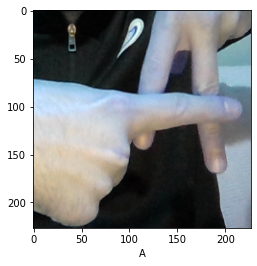

In [ ]:
plot_sample(X_test, y_test, 7)

In [ ]:
# looking at the images that them to be a specific letter (we specify the letter)
for index, item in enumerate(y_classes):
  if item==letters.index('Ş'):
    plot_sample(X_test, y_classes,index)

1/1 [==============================] - 0s 23ms/step
the name is : AHMET


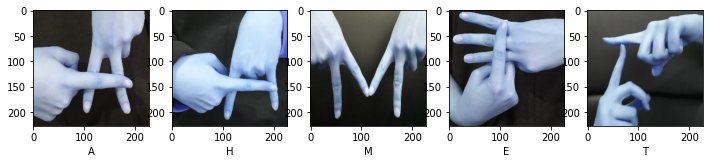

In [ ]:
# taking a list of images and giving the corresponding word or name to these images
list_of_test_images=[]
for i in sorted(os.listdir('/content/test images1')):
  image=cv2.imread("/content/test images1/"+i)
  resized=cv2.resize(image,(227,227))
  list_of_test_images.append(resized)
list_of_test_images=np.array(list_of_test_images)
list_of_test_images = list_of_test_images / 255.0
test_images_pred = model.predict(list_of_test_images)
test_images_classes = [np.argmax(element) for element in test_images_pred]
name=''
for l in test_images_classes:
  name+=letters[l]
print('the name is : '+name)
plt.subplots(figsize=(12, 12))
for i in range(len(list_of_test_images)):
  plt.subplot(1, len(list_of_test_images), i+1)
  plot_sample(list_of_test_images,test_images_classes,i)

In [ ]:
# saving the model

In [ ]:
!pip install mlxtend
import joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
joblib.dump(model,'model parameters for sign language letters classification with alexnet')

['model parameters for sign language letters classification with alexnet']

In [ ]:
mo=joblib.load('model parameters for sign language letters classification with alexnet')

In [ ]:
mo.evaluate(X_test,y_test)

17/17 [==============================] - 1s 25ms/step - loss: 0.4428 - accuracy: 0.9621


[0.44275394082069397, 0.9621211886405945]